In [1]:
pip install matplotlib pandas


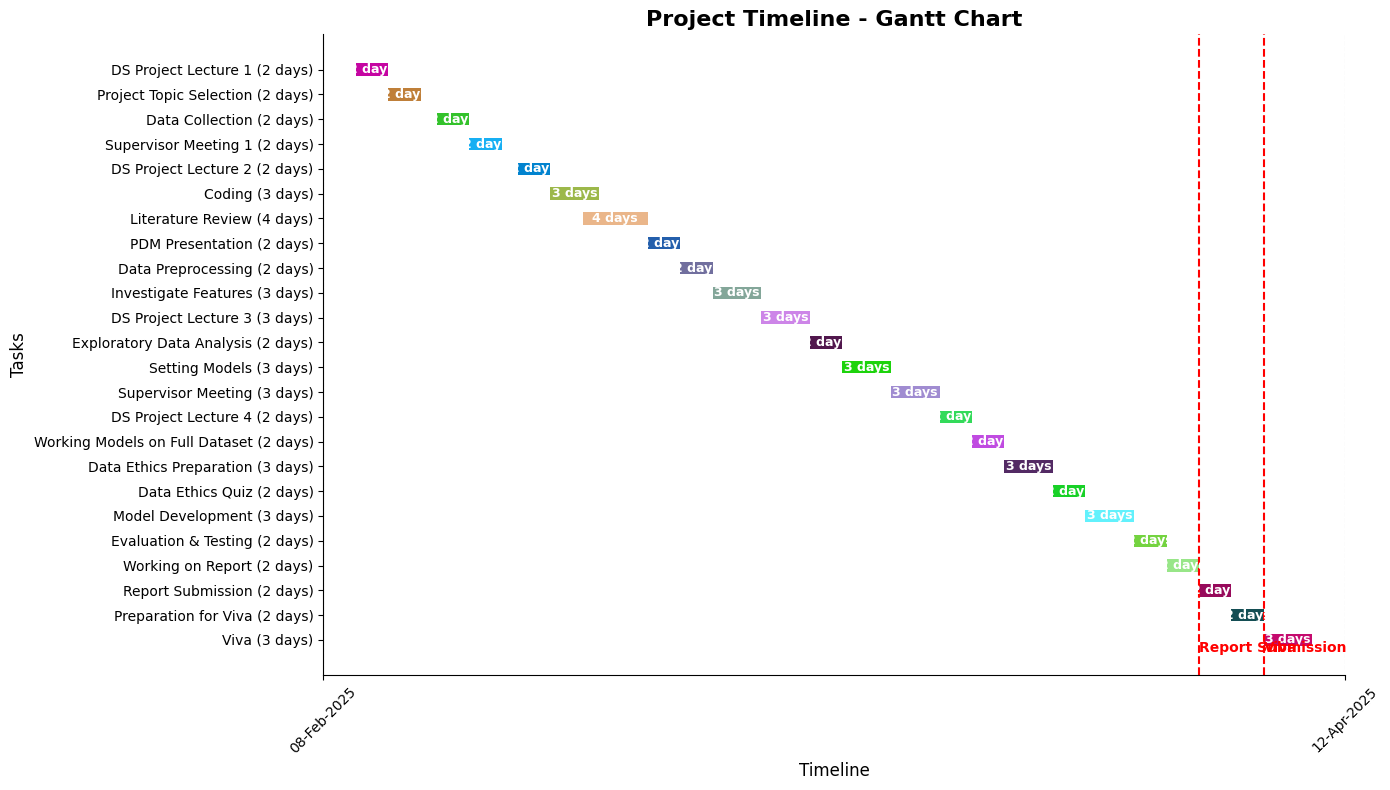

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

# Define the data
data = {
    'Task': ['DS Project Lecture 1', 'Project Topic Selection', 'Data Collection',
             'Supervisor Meeting 1', 'DS Project Lecture 2', 'Coding',
             'Literature Review', 'PDM Presentation', 'Data Preprocessing',
             'Investigate Features', 'DS Project Lecture 3', 'Exploratory Data Analysis',
             'Setting Models', 'Supervisor Meeting', 'DS Project Lecture 4',
             'Working Models on Full Dataset', 'Data Ethics Preparation',
             'Data Ethics Quiz', 'Model Development', 'Evaluation & Testing',
             'Working on Report', 'Report Submission', 'Preparation for Viva', 'Viva'],
    'Start': ['2025-02-10', '2025-02-12', '2025-02-15',
              '2025-02-17', '2025-02-20', '2025-02-22',
              '2025-02-24', '2025-02-28', '2025-03-02',
              '2025-03-04', '2025-03-07', '2025-03-10',
              '2025-03-12', '2025-03-15', '2025-03-18',
              '2025-03-20', '2025-03-22', '2025-03-25',
              '2025-03-27', '2025-03-30', '2025-04-01',
              '2025-04-03', '2025-04-05', '2025-04-07'],
    'End': ['2025-02-12', '2025-02-14', '2025-02-17',
            '2025-02-19', '2025-02-22', '2025-02-25',
            '2025-02-28', '2025-03-02', '2025-03-04',
            '2025-03-07', '2025-03-10', '2025-03-12',
            '2025-03-15', '2025-03-18', '2025-03-20',
            '2025-03-22', '2025-03-25', '2025-03-27',
            '2025-03-30', '2025-04-01', '2025-04-03',
            '2025-04-05', '2025-04-07', '2025-04-10'],
}

# Convert to DataFrame
df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = (df['End'] - df['Start']).dt.days

# Generate random colors
np.random.seed(10)
colors = np.random.rand(len(df), 3)

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Adjust bar height for better spacing
bar_height = 0.5

# Modify task names to include duration (days)
df['Task With Days'] = df['Task'] + " (" + df['Duration'].astype(str) + " days)"

# Add tasks to the Gantt chart
for i, (index, task) in enumerate(df.iterrows()):
    ax.barh(task['Task With Days'], task['Duration'], left=task['Start'], height=bar_height, color=colors[i])

    # Add duration labels inside bars
    ax.text(task['Start'] + pd.Timedelta(days=task['Duration'] / 2), i, f"{task['Duration']} days",
            va='center', ha='center', fontsize=9, color='white', fontweight='bold')

# Highlight key milestones
milestone_tasks = ['Report Submission', 'Viva']
for task_name in milestone_tasks:
    milestone = df[df['Task'] == task_name]
    ax.axvline(milestone['Start'].values[0], color='red', linestyle='--', linewidth=1.5)
    ax.text(milestone['Start'].values[0], len(df) - 0.5, task_name, color='red', fontsize=10, fontweight='bold')

# Format x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.xticks(rotation=45)

# Set x-axis limits for full date range
ax.set_xlim(df['Start'].min() - pd.Timedelta(days=2), df['End'].max() + pd.Timedelta(days=2))

# Formatting
ax.set_xlabel('Timeline', fontsize=12)
ax.set_ylabel('Tasks', fontsize=12)
ax.set_title('Project Timeline - Gantt Chart', fontsize=16, fontweight='bold')

# Remove y-axis inversion (default behavior)
ax.invert_yaxis()

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout and display plot
plt.tight_layout()
plt.show()
